In [110]:
import numpy as np
import pandas as pd
import seaborn as sns

In [111]:
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [112]:
df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [113]:
df.select_dtypes(include=['category'])

""
0
1
2
3
4
...
2121
2122
2123
2124


In [114]:
df.shape

(2126, 14)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [116]:
df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

# Remove duplicate records

In [117]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [118]:
# reset index value & remove Index column
df_clean = df.drop_duplicates().reset_index()
df_clean = df_clean.drop(['index'],axis=1)
df_clean

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2120,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2121,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2122,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


# Handling null values --> `Mode imputation`

**Using mode imputation becoz less than 30% of data has null values**

In [119]:
#replace missing values with their average column value for each record having null values
for i in df_clean.columns:
    mode = df_clean[i].mode()[0]
    df_clean[i].fillna(mode, inplace=True)

In [120]:
df_clean.isna().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

# Boxplot

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

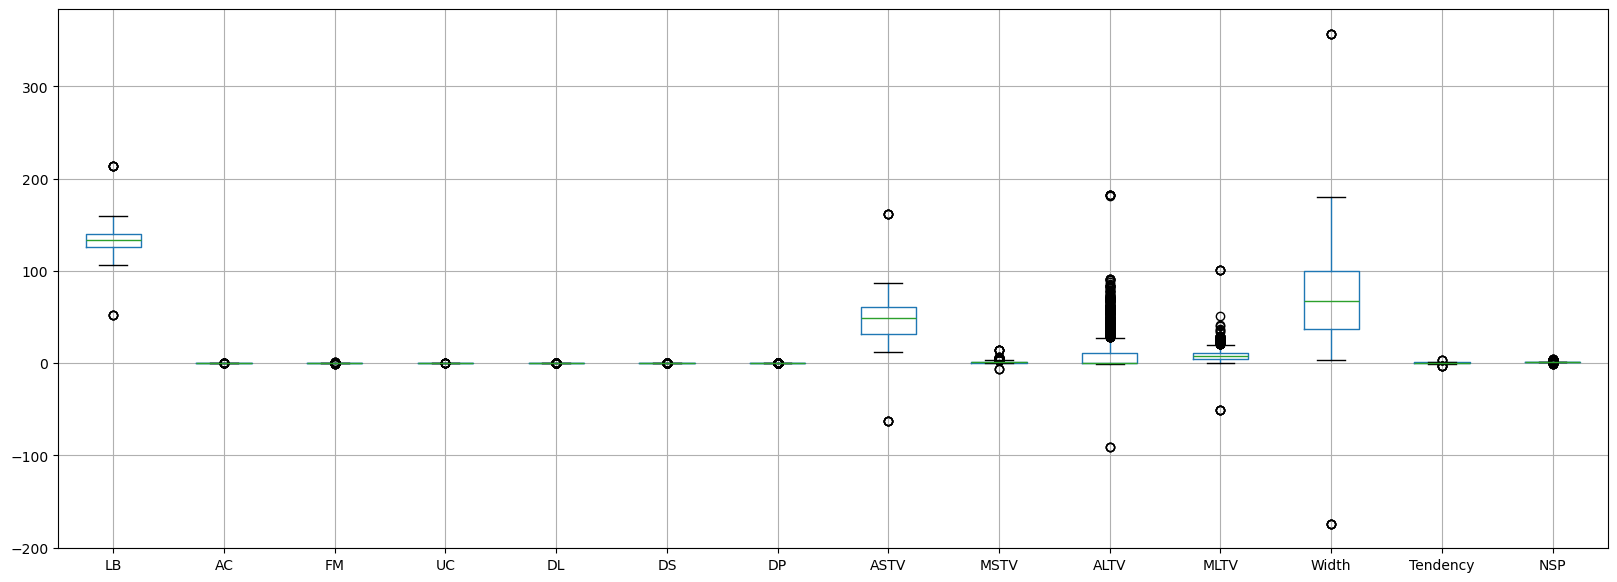

In [122]:
df_clean.boxplot(figsize=(20,7))

# Outlier detection
Using __IQR__ method</br>

### Dataset:
`df_clean`

### Parameter:
**quantile_25:** contains 25% quantile value,</br>
**quantile_75:** contains 75% quantile value,</br>
**upper_limit:** contains uppermost value for outlier,</br>
**lower_limit:** contains lowermost value for outlier,</br>
`iqr = quantile_75 - quantile_25`


In [173]:
for i in df_clean.columns:
    quantile_25 = df_clean[i].quantile(0.25)
    quantile_75 = df_clean[i].quantile(0.75)
    
    iqr = quantile_75 - quantile_25
    
    print(f'Statistics for {i}')
    print(df_clean[i].describe())
    print(f'IQR is {iqr}')
    
    upper_limit = quantile_75 + 1.5*iqr
    lower_limit = quantile_25 - 1.5*iqr
    
    print(f'Lower limit is {lower_limit}')
    print(f'Upper limit is {upper_limit}')
    
    outliers = df_clean[(df_clean[i]<lower_limit) | (df_clean[i]>upper_limit)]
    if iqr > 0:
        df_clean = df_clean[(df_clean[i]>lower_limit) & (df_clean[i]<upper_limit)]
    
    print(f'Number of outliers: {i} --> {outliers.shape[0]}')



    
    print('-'*50)

Statistics for LB
count    2124.000000
mean      133.338641
std        11.212447
min        51.842487
25%       126.000000
50%       133.000000
75%       140.000000
max       214.000000
Name: LB, dtype: float64
IQR is 14.0
Lower limit is 105.0
Upper limit is 161.0
Number of outliers: LB --> 10
--------------------------------------------------
Statistics for AC
count    2114.000000
mean        0.003187
std         0.004387
min        -0.019284
25%         0.000000
50%         0.001564
75%         0.005606
max         0.038567
Name: AC, dtype: float64
IQR is 0.0056061275
Lower limit is -0.00840919125
Upper limit is 0.01401531875
Number of outliers: AC --> 43
--------------------------------------------------
Statistics for FM
count    2071.000000
mean        0.009781
std         0.068273
min        -0.480634
25%         0.000000
50%         0.000000
75%         0.002527
max         0.961268
Name: FM, dtype: float64
IQR is 0.002526897
Lower limit is -0.0037903455000000003
Upper limit is 

In [177]:
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(['index'], axis=1)
df_clean.shape

(1301, 14)

<Axes: >

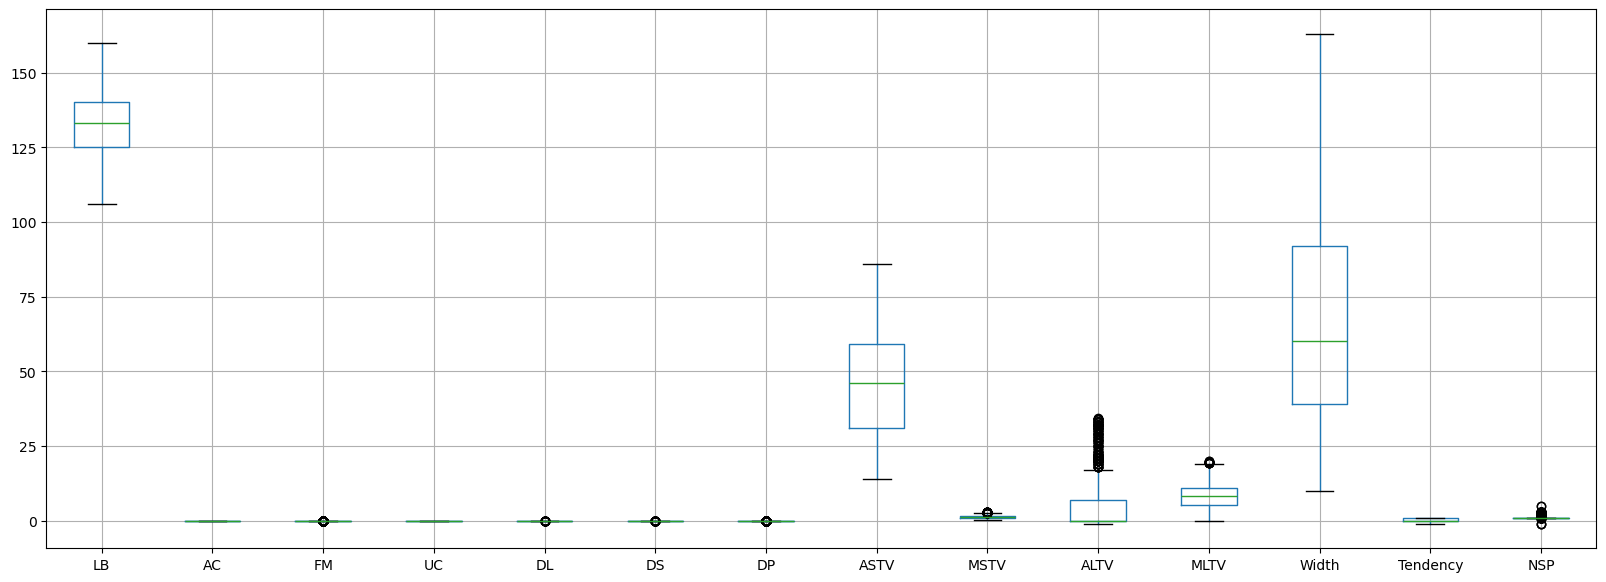

In [176]:
df_clean.boxplot(figsize=(20,7))

Text(0.5, 1.0, 'Heatmap for cardiographic')

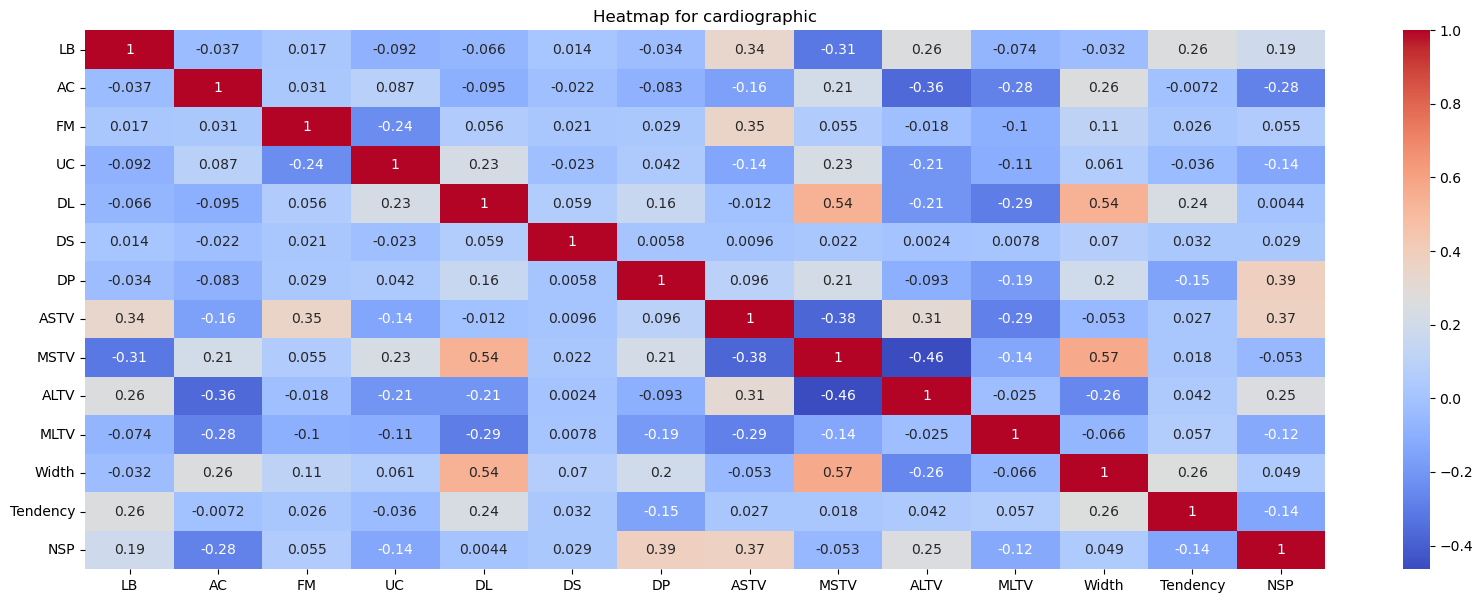

In [188]:
plt.figure(figsize=(20,7))
sns.heatmap(df_clean.corr(), cmap='coolwarm', annot=True )
plt.title('Heatmap for cardiographic')

# Scatter plot

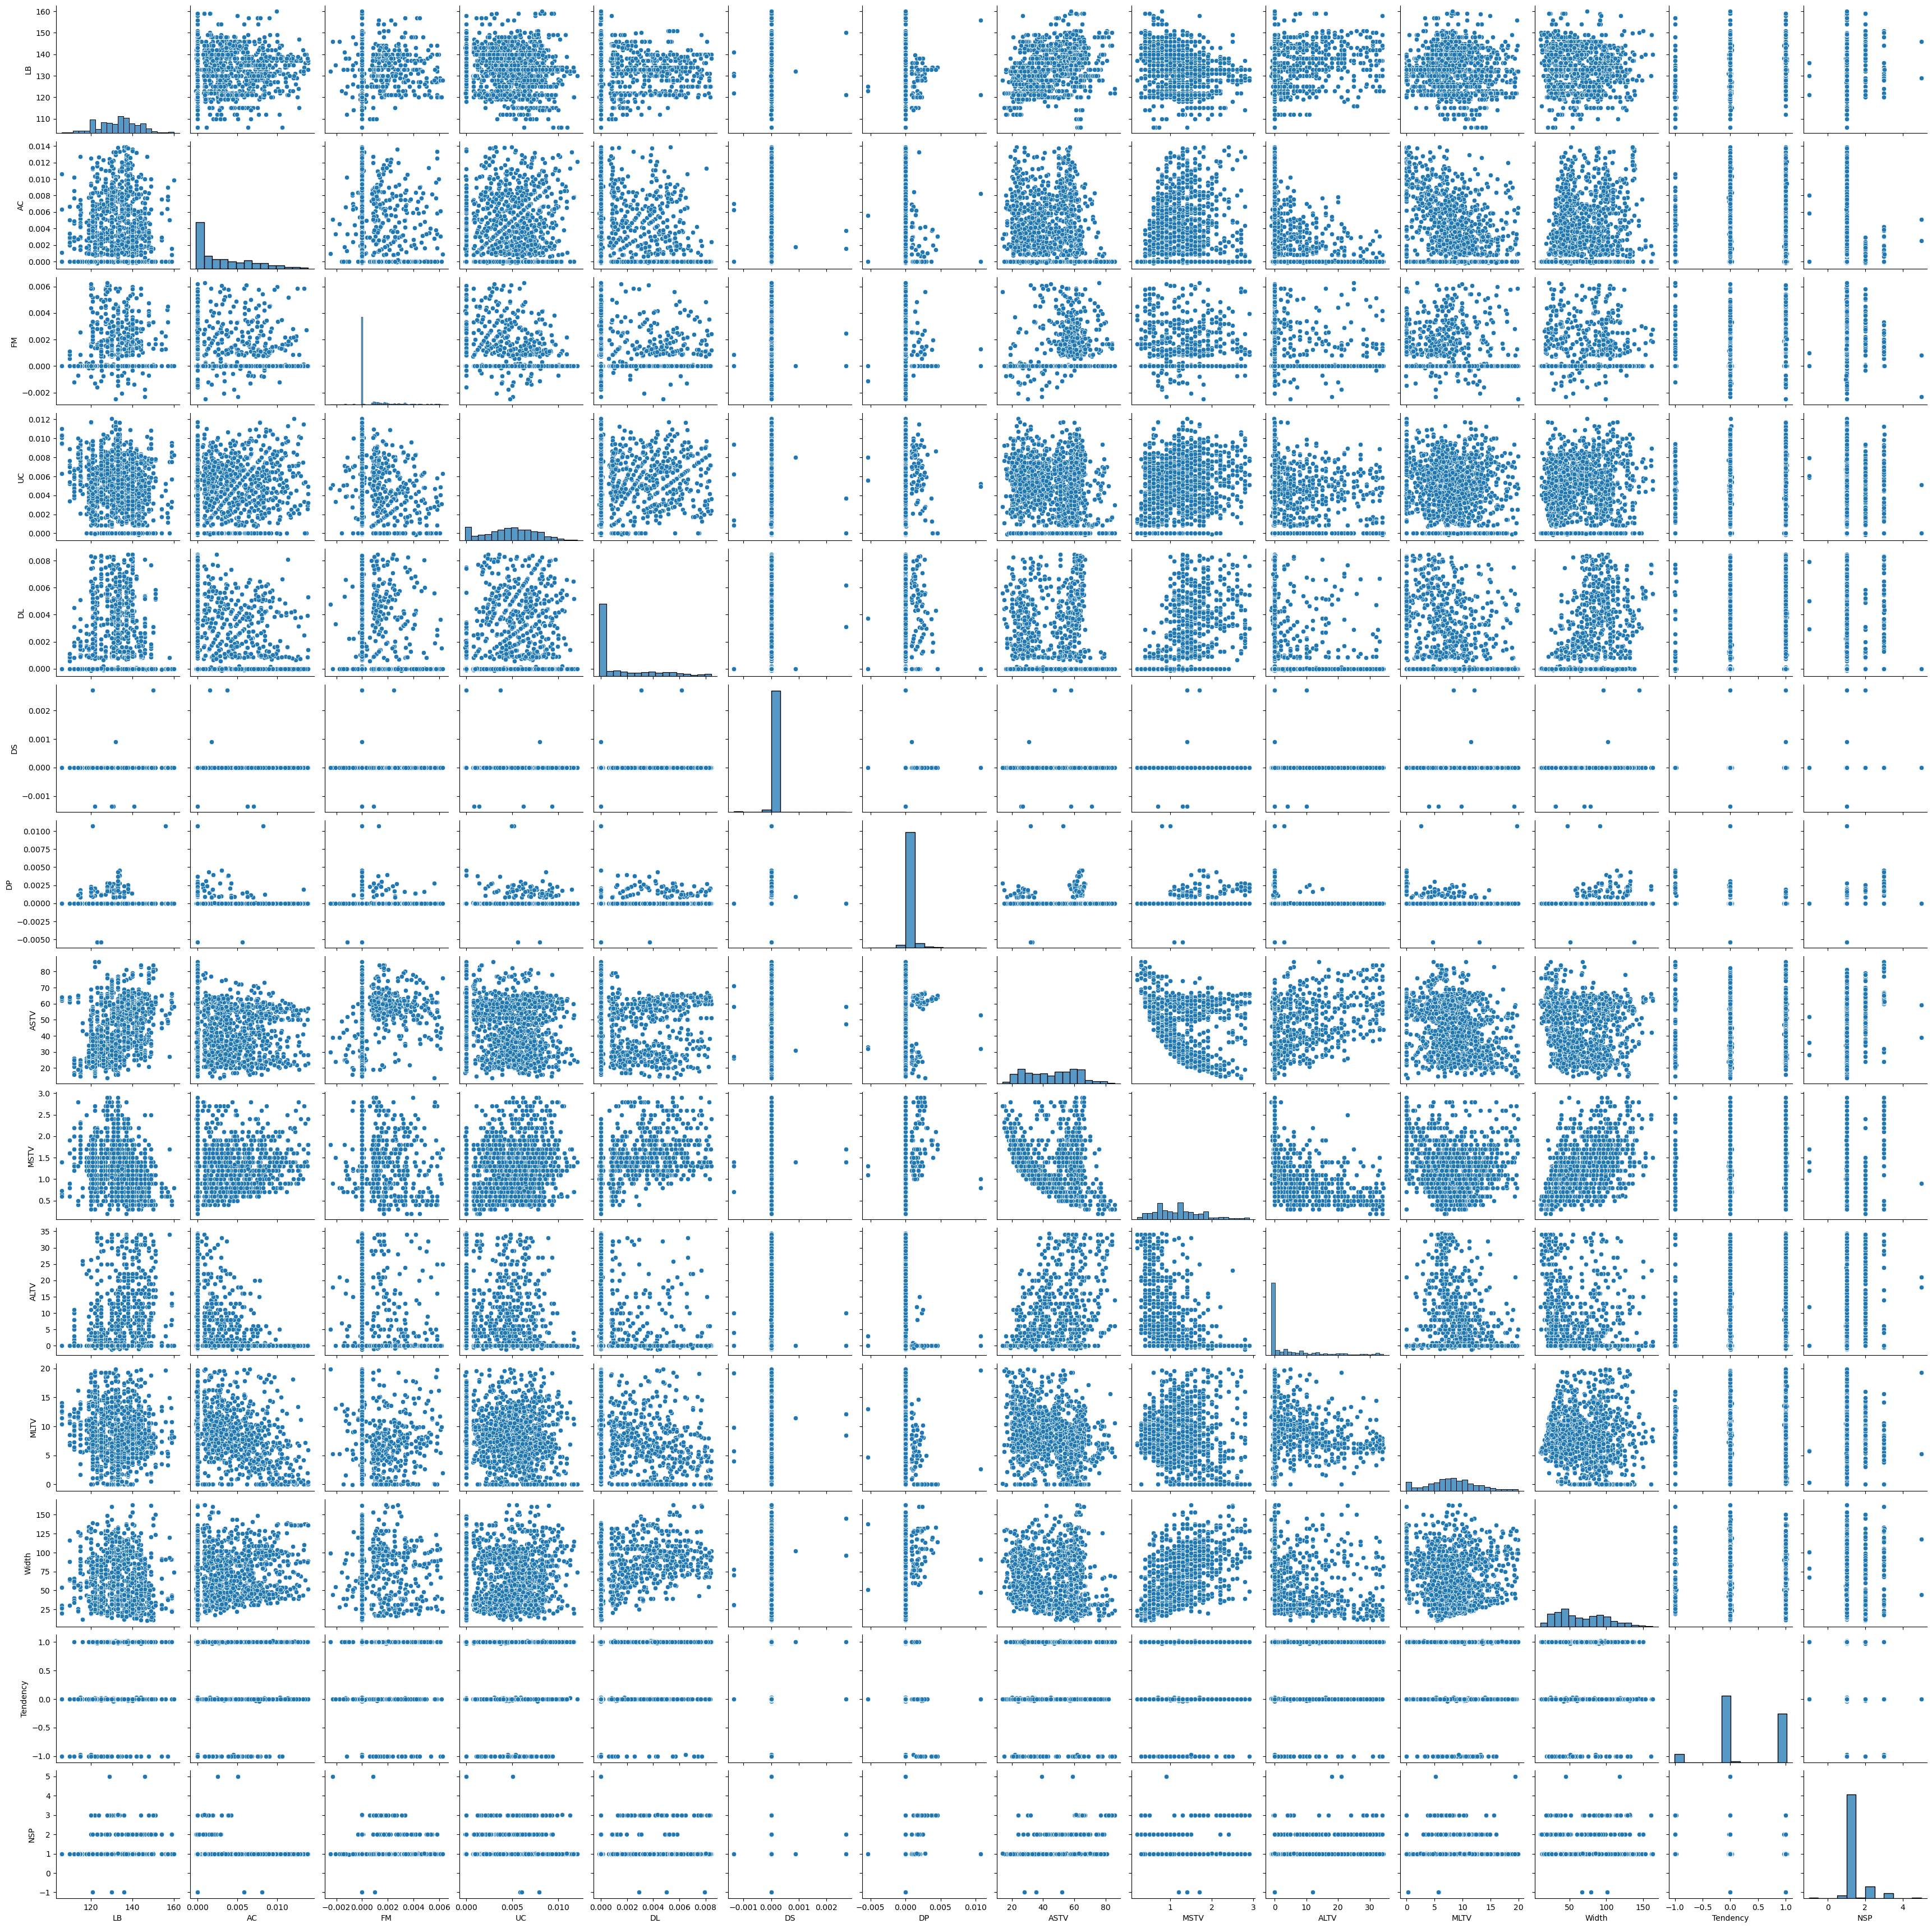

In [189]:
sns.pairplot(df_clean)

# Conclusion

From the above **Exploratory Data Analysis** we have cleaned and preprocessed the data with the mode **(mode imputation)** of each column of the data and cleared the outliers 
as the data is fully numericals(float64) there were **no categorical columns** the data of a cardiographic helps us to find the internal 
insights and patterns the data is now fully cleaned and can be used to ML models